<a href="https://colab.research.google.com/github/guipeliceri/Evolutio-Project/blob/main/01-Cancer_Diagnosis/Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**01 - Cancer Diagnosis** 🧠🔬

Bem vindos a nossa segunda atividade do projeto!

 🎯 Nosso objetivo é construir e treinar um "cérebro" artificial (uma rede neural) que aprenderá a partir de dados de exames reais. Ao final, este cérebro será capaz de analisar as características de um tumor e prever se ele é maligno (cancerígeno) ou benigno (não cancerígeno).
<br>
<br>

#**CRÉDITOS**:

O código utilizado vem do usuário
GitHub: https://github.com/KhanradCoder

E seu vídeo explicativo: https://www.youtube.com/watch?v=z1PGJ9quPV8
<br>
<br>

---

#Passo 1: Carregando Nossos Dados 📂
- Na pasta dessa primeira atividade há o arquivo cancer.csv, abra-o e clique e

Com os dados inseridos, agora podemos manipulá-los! Tudo começa com os dados. Nesses dados, cada linha representa um tumor e cada coluna uma característica medida (raio, textura, etc.).

.

.

In [ ]:
import pandas as pd

dataset = pd.read_csv('cancer.csv')

Bom, acho que você lembra o que essas linhas fazem né?



---

**Passo 3: Separando X e Y**   🧩

In [ ]:
x = dataset.drop(columns=["diagnosis(1=m, 0=b)"])

y = dataset["diagnosis(1=m, 0=b)"]

*x = dataset.drop(columns=["diagnosis(1=m, 0=b)"])*

- 🎯 O que ela faz: Ela cria uma nova tabela, chamada x, que é uma cópia de todo o dataset original, EXCETO pela coluna do diagnóstico.
- Como ela faz isso: Usamos a função *.drop()* do pandas, que serve para remover linhas ou colunas.
- columns=["..."]: Especificamos que queremos remover uma coluna (e não uma linha) e passamos o nome exato da coluna a ser removida: "diagnosis(1=m, 0=b)".

No jargão de Machine Learning, x é a nossa matriz de features (evidências)

---

*y = dataset["diagnosis(1=m, 0=b)"]*
Esta linha cria a nossa variável y.

- 🎯 O que ela faz: Ela cria uma nova variável, chamada y, que contém APENAS a coluna do diagnóstico e mais nada.
- Como ela faz isso: *dataset["..."]:* Esta é a sintaxe do pandas para selecionar uma ou mais colunas específicas. Ao passar o nome da coluna "diagnosis(1=m, 0=b)", estamos dizendo: "Do meu dataset inteiro, me dê apenas esta coluna."

No jargão de Machine Learning, y é o nosso vetor alvo (resposta)

---

 **Por que fazemos essa separação?** 🤔

 Este é o conceito central do Aprendizado Supervisionado

Nós queremos treinar nosso modelo de Inteligência Artificial para que ele aprenda a prever y (o diagnóstico) a partir de x (as evidências).

Para fazer isso, nós damos ao modelo as duas coisas durante o treinamento:

As evidências (x)
As respostas corretas para essas evidências (y)
E dizemos ao modelo: "Olhe para estas evidências e para estas respostas. Encontre os padrões. Aprenda a relação entre x e y para que, no futuro, quando eu te der um x novo que você nunca viu, você consiga me dizer qual é o y correto."

---

**Passo 4: Dividir dados para o treinamento e o teste** 📏

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

*from sklearn.model_selection import train_test_split*

- 🎯 O que ela faz: Ela importa para o nosso código a função específica train_test_split de dentro da gigantesca biblioteca scikit-learn.
-  ℹ️ O que é a biblioteca scikit-learn: Se o pandas é a nossa caixa de ferramentas para manipular dados, o scikit-learn (apelido sklearn) é a nossa caixa de ferramentas para fazer Machine Learning. É com essa biblioteca que os algoritmos de Aprendizado de Máquina atuam no projeto, buscando padrões nos dados por exemplo

---
*x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)*



**Lógica** 🧠

Imagine que você vai dar uma prova para um aluno. Se você entregar as perguntas da prova para ele estudar, ele vai decorar as respostas e tirar 10. Mas ele realmente aprendeu a matéria? Não. Ele apenas memorizou.

Com a IA, é a mesma coisa.

Se treinarmos e testarmos nosso modelo com os mesmos dados, ele pode simplesmente "decorar" as respostas. Ele teria uma performance de 100%, mas seria inútil no mundo real com dados novos. Isso se chama **overfitting**.
Ao usar o conjunto de treino (x_train, y_train), nós deixamos nosso modelo estudar e aprender os padrões.
Depois que ele está treinado, nós o desafiamos com a prova final (x_test), dados que ele nunca viu antes.
Só então comparamos as previsões dele com o gabarito oficial (y_test) para ver se ele realmente aprendeu e generalizou o conhecimento, ou se apenas decorou.

Assim:

- train_test_split(...): Estamos chamando a função que acabamos de importar.
(x, y, ...): Os primeiros argumentos são os dados que queremos dividir: nossa tabela de evidências x e nosso gabarito y.
- test_size=0.2: Este é o parâmetro mais importante aqui. Estamos dizendo à função para reservar 20% (0.2) dos dados para o conjunto de teste. Consequentemente, os outros 80% serão usados para o conjunto de treino. (Essa proporção 80/20 é um padrão muito comum).
- x_train, x_test, y_train, y_test =: A função train_test_split é especial porque ela não devolve apenas uma, mas quatro coisas, nesta ordem exata:
-- x_train: Material de Estudo (Perguntas). Contém 80% das evidências (x).
-- x_test: Prova Final (Perguntas). Contém os 20% restantes das evidências (x).
-- y_train: Gabarito do Material de Estudo (Respostas). Contém os diagnósticos corretos para o x_train.
-- y_test: Gabarito da Prova Final (Respostas). Contém os diagnósticos corretos para o x_test.
<br>
<br>
A função garante que a linha 10 de x_train corresponde à linha 10 de y_train, e assim por diante.

---

**Passo 5: Vamos preparar o treino da nossa IA!** 🏋️‍♂️

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()

Ótimo! Chegamos na parte da construção, o momento em que realmente começamos a montar a nossa Inteligência Artificial

*import tensorflow as tf*

Esta linha é sobre pegar a caixa de ferramentas mais poderosa da nossa oficina.

- 🎯 O que ela faz: Ela importa a biblioteca *TensorFlow* para o nosso projeto.
- 🤔 Por que TensorFlow: Se o *pandas* era a nossa caixa de ferramentas para arrumar os dados, e o *scikit-learn* para tarefas gerais de Machine Learning, o *TensorFlow* é a nossa oficina de engenharia pesada, especializada em construir e treinar "cérebros" artificiais, as famosas Redes Neurais. É uma das ferramentas mais utilizadas no mundo para Deep Learning, criada pelo Google.
- 🤔 Por que as *tf*: Bom, acho que você já deve saber, certo? Sim, é apenas outro apelido dado para a biblioteca, assim como *pd* do *pandas*

---

*model = tf.keras.models.Sequential()*

- 🎯 O que ela faz: Esta linha cria o "esqueleto" ou a "base" do nosso modelo de rede neural.
- Vamos quebrar em partes:
-- tf.keras: Keras é uma API do TensorFlow que funciona como uma interface de "alto nível". Em outras palavras, ele torna o processo de construir redes neurais muito mais fácil e intuitivo, como se fosse um conjunto de plantas e moldes pré-fabricados.
-- .models.Sequential(): Estamos escolhendo um tipo específico de molde: um modelo Sequencial.
-- model = : Estamos guardando este molde vazio em uma variável chamada model.

---

**O que significa um modelo "Sequencial"?**

Pense em montar um Lego. Um modelo Sequencial significa que vamos construir nosso cérebro em uma sequência lógica, uma camada de "tijolos" de Lego em cima da outra, em uma pilha reta e organizada. É a forma mais simples, comum e direta de se construir uma rede neural.

 💡 Analogia: A linha* model = tf.keras.models.Sequential()* é como pegar aquela placa de Lego verde, plana e vazia. Ela ainda não tem nenhuma peça, mas é a base sobre a qual vamos começar a empilhar nossos "tijolos" (as camadas de neurônios)
<br>
<br>
<br>
**Agora, vamos adicionar as camadas de dados da nossa IA (layers)**

In [ ]:
model.add(tf.keras.layers.Dense(256, input_shape=(x_train.shape[1],), activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Vamos analisar linha por linha, pois cada uma representa uma camada do nosso cérebro artificial.

O Conceito-Chave: *model.add(tf.keras.layers.Dense(...))*

- model.add(...): Este é o comando para "adicionar" uma nova camada ao nosso esqueleto (model). Como nosso modelo é Sequencial, cada add coloca uma nova camada em cima da anterior.
- tf.keras.layers.Dense(...): Este é o tipo de camada que estamos adicionando. Uma camada Dense (ou "densa") é o tipo mais comum e fundamental. Ela significa que cada neurônio nesta camada está conectado a todos os neurônios da camada anterior. É uma camada "totalmente conectada", o que permite que as informações se cruzem e se combinem de forma complexa.

---

*model.add(tf.keras.layers.Dense(256, input_shape=x_train.shape[1], activation='sigmoid'))*

Esta é a primeira camada que recebe os dados.

- Dense(256, ...): O primeiro número, 256, é a quantidade de neurônios (ou nós) que esta camada terá. Pense neles como 256 pequenos "calculadores" que trabalharão em paralelo para encontrar padrões. A escolha desse número é uma decisão de design; mais neurônios podem aprender padrões mais complexos, mas também tornam o modelo mais pesado.
- input_shape=(x_train.shape[1],): O Formato da Ficha de Entrada
-- 🎯 O que é: Este parâmetro é exclusivo e obrigatório para a primeira camada. Ele define como os dados devem chegar.
-- 💡 Analogia: É como dizer à recepção: "Atenção! Cada paciente que chegar vai nos entregar uma ficha com exatamente 30 campos preenchidos". O modelo precisa saber disso para preparar as conexões corretas para cada um dos 256 analistas.
Detalhe Técnico Importante:
-- x_train.shape nos dá as dimensões (455, 30) (linhas, colunas).
-- x_train.shape[1] pega apenas o segundo valor: 30 (o número de features/colunas).
Colocamos entre (...,) para que o formato seja uma "tupla", que é como o Keras espera receber essa informação.
- activation='sigmoid': A função de ativação é como o "interruptor de intensidade" de um neurônio. Depois que o neurônio soma todos os sinais que recebe, a função de ativação decide qual será a força do sinal que ele passará para a próxima camada. A sigmoid espreme o resultado em um valor entre 0 e 1.

---

# Mas por que usamos essa função? 🤔

**Neurônios recebem sinais de força de outros neurônios anteriores, para basearem suas decisões**

Imagine que um neurônio é um segurança na porta de uma balada muito exclusiva.

1. Os Sinais que o Neurônio Recebe
Antes de você, o segurança, tomar sua decisão, você observa várias coisas sobre o grupo de pessoas que quer entrar. Cada uma dessas "observações" é um sinal vindo da camada anterior de neurônios.

Sinal 1: A roupa da pessoa (vindo do neurônio_roupa)
Sinal 2: A educação da pessoa (vindo do neurônio_educação)
Sinal 3: O tom de voz da pessoa (vindo do neurônio_tom_de_voz)
Só que para você, o segurança, algumas coisas são mais importantes que outras. A importância que você dá a cada sinal é o "peso" daquela conexão.

Roupa elegante: Peso +2.0 (muito importante, fator positivo)
Educação: Peso +1.5 (importante, fator positivo)
Tom de voz alto/agressivo: Peso -3.0 (muito importante, fator negativo)

2. O Neurônio Soma Todos os Sinais (A "Primeira Impressão")
A primeira coisa que o neurônio/segurança faz é juntar todas essas informações para formar uma "impressão bruta". Ele multiplica a força de cada sinal pelo seu peso e soma tudo.

Digamos que hoje ele recebeu os seguintes sinais:

Roupa: 1 (boa) -> 1 * 2.0 = +2.0
Educação: 0.8 (ok) -> 0.8 * 1.5 = +1.2
Tom de voz: -1.5 (ruim) -> -1.5 * -3.0 = +4.5 (Opa, o tom de voz era ruim, mas como o peso era negativo, um sinal ruim x um peso negativo vira algo positivo na conta final - isso é parte da mágica do aprendizado! Mas vamos simplificar).
Vamos imaginar uma soma mais simples:

Sinal da roupa (+5)
Sinal da educação (+3)
Sinal do tom de voz (-10)
Soma Bruta Total: 5 + 3 - 10 = -2.

Este valor, -2, é o "placar bruto" ou a "soma ponderada". É a primeira impressão do segurança. Pode ser qualquer número, positivo ou negativo.

3. A Função de Ativação (A Decisão Final do Segurança)
Agora vem a sua frase: "a função de ativação decide qual será a força do sinal que ele passará para a próxima camada".

O segurança olhou para o placar bruto de -2. Ele não pode simplesmente gritar "-2!" para o segurança da próxima área (a área VIP). Ele precisa traduzir essa impressão em uma decisão clara e padronizada.

É aqui que entra a Função de Ativação (o nosso sigmoid). Ela é o livro de regras do segurança.

O livro de regras sigmoid diz:

"Qualquer que seja o seu placar bruto, você deve traduzi-lo em um 'nível de permissão' entre 0% e 100% (ou 0 e 1)."
"Se o placar for muito alto (ex: +50), seu nível de permissão é 100% (valor 1.0)."
"Se o placar for muito baixo (ex: -40), seu nível de permissão é 0% (valor 0.0)."
"Se o placar for exatamente 0, seu nível de permissão é 50% (valor 0.5)."
Então, o segurança pega o placar bruto -2 e consulta o livro de regras da Sigmoid. O resultado de sigmoid(-2) é aproximadamente 0,12.

Conclusão: O Sinal que Ele Passa Adiante
A "força do sinal" que este neurônio/segurança passa para a próxima camada é 0,12.

Ele não passou o placar bruto de -2.
Ele passou uma decisão normalizada e padronizada: "Meu nível de entusiasmo/permissão para este grupo é de 12%".
Os neurônios da próxima camada receberão este sinal de "12% de força" e o usarão em seus próprios cálculos para tomar suas próprias decisões.

É assim que a informação flui e é transformada através da rede: cada neurônio recebe múltiplos sinais, faz uma soma ponderada para ter uma "impressão bruta" e, em seguida, usa sua função de ativação para decidir com que "intensidade" (um valor entre 0 e 1, no caso da Sigmoid) ele vai passar essa informação adiante.
<br>
<br>

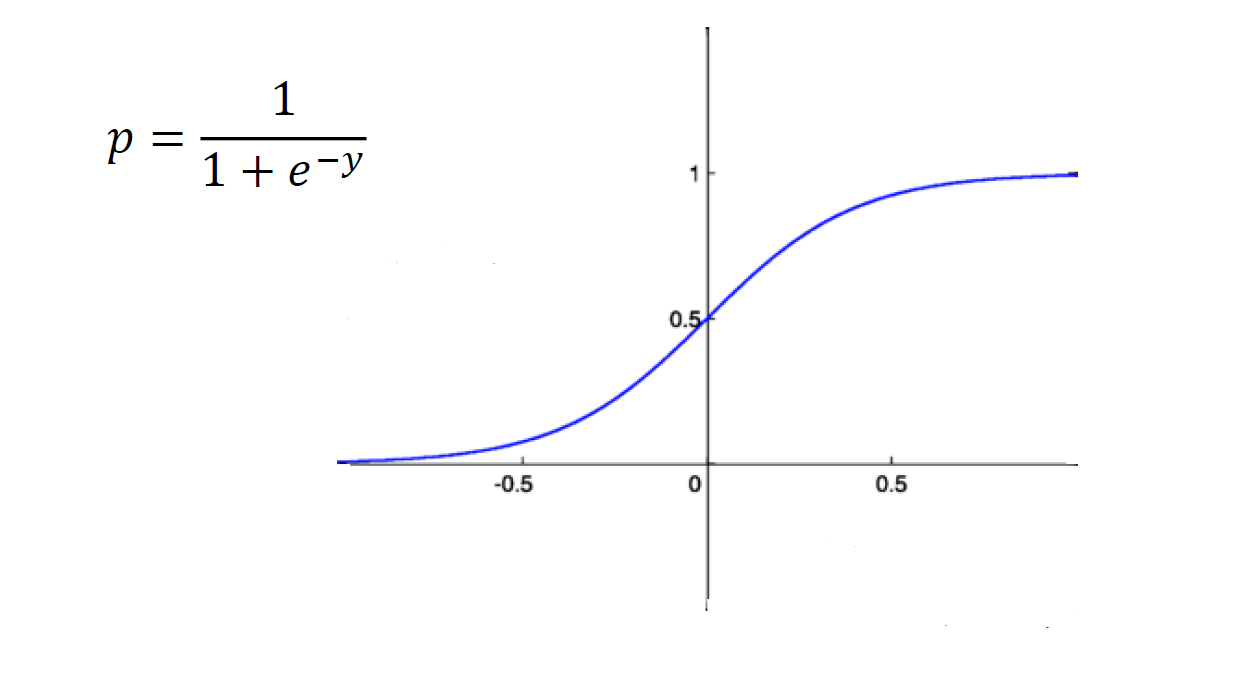

Função Sigmoide

---

*model.add(tf.keras.layers.Dense(256, activation='sigmoid'))*

Esta é a nossa segunda camada, que recebe os sinais da primeira.

Dense(256, ...): Novamente, estamos usando 256 neurônios para continuar processando a informação.
Sem input_shape: Note que não precisamos mais dizer o formato da entrada. O Keras é inteligente e já sabe que esta camada receberá os 256 sinais da camada anterior.
activation='sigmoid': Continuamos usando a mesma função de ativação.


---

*model.add(tf.keras.layers.Dense(1, activation='sigmoid'))*

🎯 Esta é a camada final e mais importante para a nossa resposta. Diferente das outras camadas, ela não é oculta, é ela que chamamos de resposta, e precisamos ver a resposta não é?

- Dense(1, ...): Note que aqui temos apenas 1 neurônio. Por quê? Porque nosso problema é de classificação binária. Queremos uma única resposta: a probabilidade do tumor ser maligno (1) ou benigno (0). Um único neurônio é suficiente para nos dar essa única saída.
- activation='sigmoid': Aqui, a função sigmoid é a escolha perfeita para a camada de saída. Como ela sempre resulta em um valor entre 0 e 1, podemos interpretar diretamente a saída do nosso modelo como uma probabilidade.
Se o modelo cuspir 0.95, ele está 95% confiante de que o diagnóstico é '1' (maligno).
Se ele cuspir 0.02, ele está 2% confiante de que é '1' (ou seja, 98% confiante de que é '0', benigno).

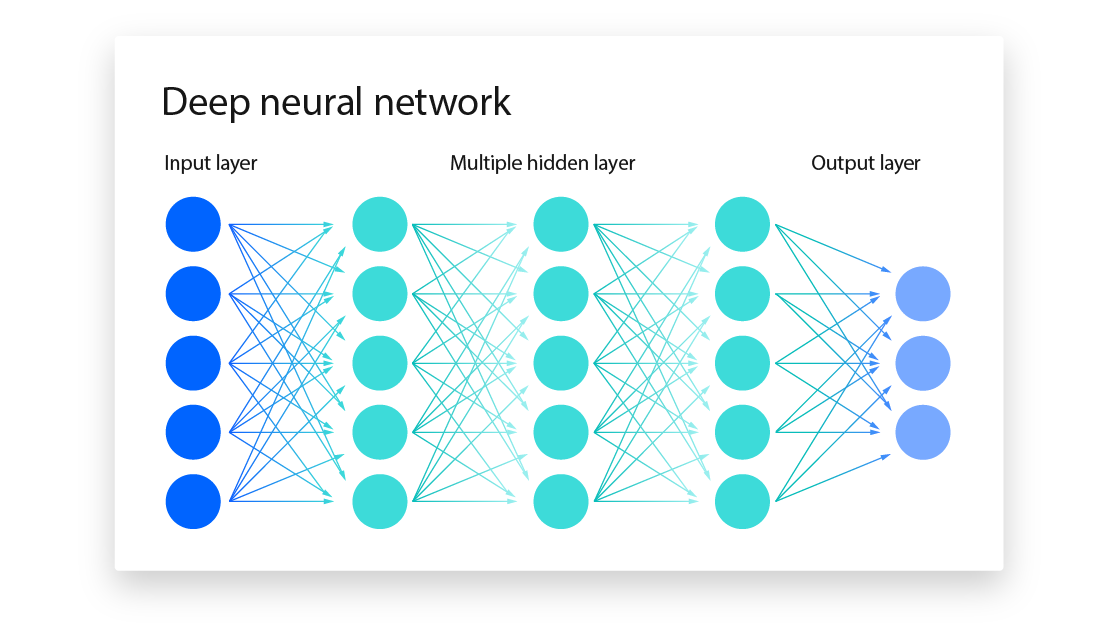

Representação das camadas de uma IA

---

# Mas como saber quantos neurônios vamos usar no código?

Essa é uma pergunta de milhões nos códigos de IA! A resposta é depende. Depende do problema que você quer resolver.

Vamos analisar isso ao longo das aulas

---

**Temos a arquitetura montada, mas como ela vai aprender?**

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

*model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])*

🎯 Vamos quebrar cada um desses três "parâmetros":

1. *optimizer='adam':* **O GPS para Encontrar a Melhor Resposta**
- O que é um optimizer (otimizador)? É o método que o modelo usará para ajustar seus "pesos" internos e melhorar suas previsões. A cada resposta errada, o otimizador calcula em qual direção e com que intensidade ele deve ajustar seus neurônios para errar menos na próxima vez.
- 💡 Analogia: Imagine que o seu modelo está no topo de uma montanha nebulosa e o objetivo é chegar ao ponto mais baixo do vale (o ponto de menor erro). O otimizador é o seu GPS ou Waze. Ele te diz "dê um passo para a esquerda... agora um passo um pouco maior para frente..." para te guiar até o fundo do vale da forma mais eficiente possível.
- 🤔 Por que 'adam'? Adam é um  dos otimizadores mais populares e eficientes que existem. Ele é adaptativo, o que significa que ele ajusta a "velocidade" do aprendizado conforme avança. É uma escolha padrão excelente, como usar o Waze em vez de um mapa de papel.
---
2. *loss='binary_crossentropy':* **A "Nota" do Erro do Modelo**
- O que é a loss (função de perda)? É a fórmula matemática que calcula o quão "errado" o modelo está. Ela compara a previsão do modelo com a resposta correta e gera um número. Quanto maior o número, maior o erro.
O único objetivo do modelo durante o treinamento é fazer com que o valor da loss seja o menor possível.
- 💡 Analogia: Se o otimizador é o GPS, a função de perda é a altitude. O GPS usa a altitude para saber se está subindo ou descendo. O modelo usa a loss para saber se suas previsões estão melhorando ou piorando.
Por que 'binary_crossentropy'? O nome parece complicado, mas a ideia é simples. Esta é a função de perda perfeita para classificação binária (0 ou 1), especialmente quando a saída do seu modelo é uma probabilidade (graças à nossa camada final com sigmoid). Ela penaliza severamente o modelo quando ele está muito confiante, mas errado (ex: prever 99% de chance de ser maligno quando na verdade era benigno).
---
3. *metrics=['accuracy']:* **O Boletim para Nós, Humanos**
- O que são metrics (métricas)? São as medidas que nós, os humanos, queremos ver para avaliar o desempenho do modelo. Elas não são usadas pelo modelo para aprender (ele só se importa com a loss), mas são impressas na tela para nos informar sobre o progresso.
- 💡 Analogia: A loss é a "dificuldade" que o aluno sente ao estudar, e ele tenta minimizar essa dificuldade. A accuracy é a nota no boletim que o professor mostra aos pais.
- 🤔 Por que ['accuracy']? Estamos pedindo: "Além de tentar minimizar a loss, por favor, me mostre também a acurácia (a porcentagem de acertos) a cada etapa do treino". É a métrica mais intuitiva para entendermos rapidamente se nosso modelo está indo bem.

---

Mas poxa vida, só escrevemos código e nada acontece...

**Passo 6: Finalmente colocamos a IA em ação**


In [ ]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5702 - loss: 0.6784
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8892 - loss: 0.4575 
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9155 - loss: 0.3493 
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8988 - loss: 0.3145 
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8968 - loss: 0.2710 
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9270 - loss: 0.2172 
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9107 - loss: 0.2291 
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9201 - loss: 0.2135 
Epoch 9/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9042 - loss: 0.2336 
Epoch 10/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9049 - loss: 0.2236 
Epoch 11/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9162 - loss: 0.2258 
Epoch 12/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0

*model.fit(x_train, y_train, epochs=1000)*

Esta linha de código diz ao nosso modelo: "Agora, comece a treinar!". É o apito inicial, o começo do "training montage" do filme.

- *model.fit(...):* O nome da função, .fit(), vem da ideia de "ajustar" (to fit) os parâmetros internos do modelo aos dados. É o comando que inicia o ciclo de treinamento.
Vamos analisar os "ingredientes" que damos para este treino:

- 1. x_train: O Material de Estudo (As Perguntas)
Este é o primeiro argumento que passamos. É o nosso conjunto de treino com todas as evidências (as características dos tumores).
Analogia: Entregamos ao nosso "aluno-robô" o livro com todos os exercícios e exemplos que ele precisa estudar. 💡
- 2. y_train: O Gabarito (As Respostas)
Este é o segundo argumento. É o conjunto com os diagnósticos corretos que correspondem a cada exemplo em x_train.
Analogia: Junto com o livro de exercícios (x_train), entregamos o gabarito com as respostas corretas (y_train). O aluno usa o gabarito para verificar se está acertando e para corrigir seus erros. 💡
- 3. epochs=1000: A Duração do Treino (Repetição)
Este é um dos parâmetros mais importantes do treinamento.
- O que é uma "Época" (Epoch)? Uma época significa uma passada completa por todo o material de estudo. Se o nosso x_train tem 455 amostras, uma época termina quando o modelo viu todas as 455 amostras uma vez.
- 🤔 Por que 1000? Estamos dizendo ao nosso modelo para estudar o material de treino completo 1000 vezes. A cada vez, ele tenta refinar um pouco mais seu conhecimento. O aprendizado de uma rede neural é um processo gradual e repetitivo. Ela não aprende tudo de uma vez. A cada época, ela ajusta seus pesos para tentar diminuir a loss (o erro) e aumentar a accuracy (a acurácia).
- 💡 Analogia: epochs=1000 é como dizer ao atleta para fazer sua rotina de treino completa (correr, pular, levantar pesos) 1000 vezes até a competição. A cada repetição, ele fica um pouco mais forte, mais rápido e mais preciso.

---

# ℹ️  Mas por que 1000 epochs?
- A resposta curta é: Você treina o suficiente para o modelo aprender os padrões, mas para ANTES que ele comece a decorar o material de estudo. Iremos falar sobre isso no final desse código!

---
E agora?

-
Quando você executar esta linha, verá o treinamento acontecendo em tempo real. O Colab irá mostrar uma barra de progresso para cada uma das 1000 épocas e, ao final de cada uma, exibirá os valores da loss e da accuracy.

Idealmente, você verá o valor da loss diminuir e o da accuracy aumentar a cada época, mostrando que seu modelo está, de fato, aprendendo!

**Passo 7: Testar a IA com dados de teste**

In [ ]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9728 - loss: 0.1076  


[0.11959287524223328, 0.9736841917037964]

Chegamos ao momento da verdade! Depois de todo o trabalho de preparar os dados, construir a arquitetura e treinar o modelo, esta linha vai nos dizer se nossa IA realmente aprendeu ou se estava apenas "colando" dos exercícios.

*model.evaluate(x_test, y_test)*

- 🎯 O que ela faz: Ela avalia o desempenho do nosso modelo treinado usando um conjunto de dados que ele nunca viu antes. Isso nos dá uma medida honesta e imparcial de quão bem ele se sairá no mundo real.
- 💡 Analogia: Depois de semanas de estudo (model.fit), chegou o dia da prova final. O professor (nós) entrega ao aluno (model) uma folha de questões novas (x_test) e, depois que o aluno entrega suas respostas, o professor as corrige usando o gabarito oficial e secreto (y_test).
Analisando os "Ingredientes"
x_test: A Prova em Branco

Este é o nosso conjunto de teste com as evidências (as características dos tumores) que separamos no início. O modelo nunca usou esses dados para treinar.
- y_test: O Gabarito Secreto! Este é o conjunto com os diagnósticos corretos correspondentes ao x_test. O modelo não tem acesso a isso durante a prova; ele é usado apenas no final para calcular a nota.

- O Que Acontece "Por Baixo dos Panos"?
Quando você executa *model.evaluate():*
-- O modelo pega cada amostra do x_test e faz uma previsão.
Ele compara suas previsões com as respostas corretas do y_test.
Ele calcula as métricas que definimos na etapa model.compile(). No nosso caso, ele calculará a loss (o erro médio) e a accuracy (a porcentagem de acertos).




---



---

## Parabéns pra você que chegou até aqui! 🏆
### Completamos nosso primeiro código passo a passo, e com essa experiência podemos aprender uma boa base do que está por vir!
---
Agora vamos retornar a pergunta:
 # Mas por que 1000 epochs? Como decidir quantas usar?

### O Equilíbrio Delicado: "Não Estudar o Suficiente" vs. "Estudar Demais"
**1. Poucas Épocas (Underfitting)**
- 🎯 O que é: O modelo não treina o suficiente. Ele não tem tempo de ver os dados repetidas vezes para aprender os padrões complexos.
- 💡 Analogia: É o aluno que só lê o primeiro capítulo do livro na véspera da prova. O desempenho dele será ruim tanto nos exercícios (treino) quanto na prova final (teste), porque ele simplesmente não aprendeu a matéria.
- 🩺 Sintoma: A acurácia do modelo é baixa tanto nos dados de treino quanto nos de teste.


**2. Muitas Épocas (Overfitting)**
- 🎯 O que é: O modelo treina demais. Ele fica tão obcecado com os dados de treino que começa a decorar não só os padrões úteis, mas também os ruídos, as exceções e as particularidades daquele conjunto de dados específico.
- 💡 Analogia: É o aluno que leu o livro de exercícios 1000 vezes. Ele decorou a resposta de cada pergunta, na ordem exata em que aparecem. Ele gabarita os exercícios (treino), mas quando chega na prova final (teste), que tem perguntas parecidas, mas não idênticas, ele não sabe o que fazer, pois não aprendeu o conceito por trás, apenas a resposta específica.
- 🩺 Sintoma: A acurácia no treino é altíssima (ex: 99-100%), mas a acurácia no teste é significativamente menor.
Nosso objetivo é encontrar o "ponto de ouro" entre esses dois extremos.

Como Encontrar o Ponto Ideal? Monitorando o Treino!

- Em projetos "reais", às vezes se cria um terceiro conjunto de dados só para validação.


### Podemos usar para validação aos poucos, e testar as diferentes quantidade de epoch:
*history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test2, y_test2))*

---

Agora vamos completar essa atividade com alguns problemas enfrentados por mim que acredito ser válido você saber!

# ❌ Erro Encontrado

Durante a realização do código fornecido na internet, a execução do mesmo falhou:

Erro encontrado - *ValueError: ... Expected shape (None, 455, 30), but input has incompatible shape (None, 30)*

Beleza, mas o que significa isso?

Acontece que na linha de código do vídeo de KhanradCoder a primeira Layer construída foi essa:
- *model.add(tf.keras.layers.Dense(256, input_shape=x_train.shape, activation='sigmoid'))*

e a que usamos (corrigida) é:

- *model.add(tf.keras.layers.Dense(256, input_shape=(x_train.shape[1],), activation='sigmoid'))*

### Acontece que o parâmetro *input_shape* pede apenas o formato de UMA ÚNICA AMOSTRA de dados (uma única linha da sua tabela), e não o formato do conjunto de dados de treino inteiro, caso esse que foi passado no código errado

Então nossa IA estava esperando receber várias amostras de tamanho (0, 455, 30).

Ao colocar [1], nós só pegamos o **a segunda dimensão** da tabela inteira, que no caso é (455, **30**)

O correto é dizer a ele que cada amostra é apenas um vetor com 30 features. O formato de uma única amostra é (30,).

---

